# CH-09 ËÆì AI Ë©ï‰º∞ÊäïË≥áÁµÑÂêàÈ¢®Èö™

## 9-1 Ë≥áÈáëÁÆ°ÁêÜ

### 1Ô∏è‚É£ ÂñÆÊ¨°Ë≥≠Â±ÄÁöÑÊúüÊúõË≥áÁî¢

‰ª•‰∏ãÁÇ∫Ë≥†Áéá1ÁöÑË≥≠Â±Ä

In [ ]:
bet = 500 # ‰∏ãÊ≥®ÈáëÈ°ç
win_rate = 0.8 # ÂãùÁéá
wealth = 1000 # Ë≥áÁî¢

# ÊúüÊúõÁç≤Âà©
gain = win_rate * bet + (1-win_rate) * -bet
wealth += gain
print("ÈÄôÊ¨°Ë≥≠Â±ÄÊúüÊúõÁç≤Âà©ÁÇ∫:",gain)
print("ÊúüÊúõÁ∏ΩË≥áÁî¢ÁÇ∫:",wealth)

ÈÄôÊ¨°Ë≥≠Â±ÄÊúüÊúõÁç≤Âà©ÁÇ∫: 300.0
ÊúüÊúõÁ∏ΩË≥áÁî¢ÁÇ∫: 1300.0


### 2Ô∏è‚É£ ÂñÆ‰∏ÄË≥≠Â±ÄÁöÑÈö®Ê©üÁµêÊûú

In [ ]:
import random

def single_bet(bet, win_rate, wealth, odds=1, verbose=True):
  # ÂñÆ‰∏ÄË≥≠Â±ÄÁç≤Âà©
  if random.uniform(0,1) <= win_rate:
    gain = bet * odds
  else:
    gain = -bet
  wealth += gain

  if verbose:
    print("ÈÄôÊ¨°Ë≥≠Â±ÄÁöÑÁç≤Âà©ÁÇ∫:", gain)
    print("Á∏ΩË≥áÁî¢ÁÇ∫:", wealth)

  return wealth

single_bet(bet=1000, win_rate=0.8, wealth=1000)

ÈÄôÊ¨°Ë≥≠Â±ÄÁöÑÁç≤Âà©ÁÇ∫: 1000
Á∏ΩË≥áÁî¢ÁÇ∫: 2000


2000

### 3Ô∏è‚É£ ÈáçË§áË≥≠Â±ÄÁöÑË≥áÁî¢ËÆäÂåñ

In [ ]:
def simulate_bets(initial_wealth, bet_ratio,
                  win_rate, num_bets=100, odds=1, verbose=True):
  wealths = [initial_wealth]
  wealth = initial_wealth
  for i in range(num_bets):
    bet = wealth * bet_ratio
    wealth = single_bet(bet=bet, win_rate=win_rate,
                        wealth=wealth, odds=odds, verbose=verbose)
    wealths.append(wealth)
    # Ëº∏ÂÖâÂ∞±Ë∑≥Âá∫Ëø¥Âúà
    if wealth <= 0:
        break
  return wealths

simulate_bets(initial_wealth=1000, bet_ratio=1 ,win_rate=0.8)

ÈÄôÊ¨°Ë≥≠Â±ÄÁöÑÁç≤Âà©ÁÇ∫: 1000
Á∏ΩË≥áÁî¢ÁÇ∫: 2000
ÈÄôÊ¨°Ë≥≠Â±ÄÁöÑÁç≤Âà©ÁÇ∫: -2000
Á∏ΩË≥áÁî¢ÁÇ∫: 0


[1000, 2000, 0]

### 4Ô∏è‚É£ ‰∏çÂêå‰∏ãÊ≥®ÈáèÁöÑË≥áÁî¢ÊàêÈï∑ÂπÖÂ∫¶

ÊúÄÂ•ΩÁöÑ‰∏ãÊ≥®ÊØî‰æãÁÇ∫: Ratio 0.5, ÊúÄÁµÇË≥áÁî¢Ôºö255005527446580.88


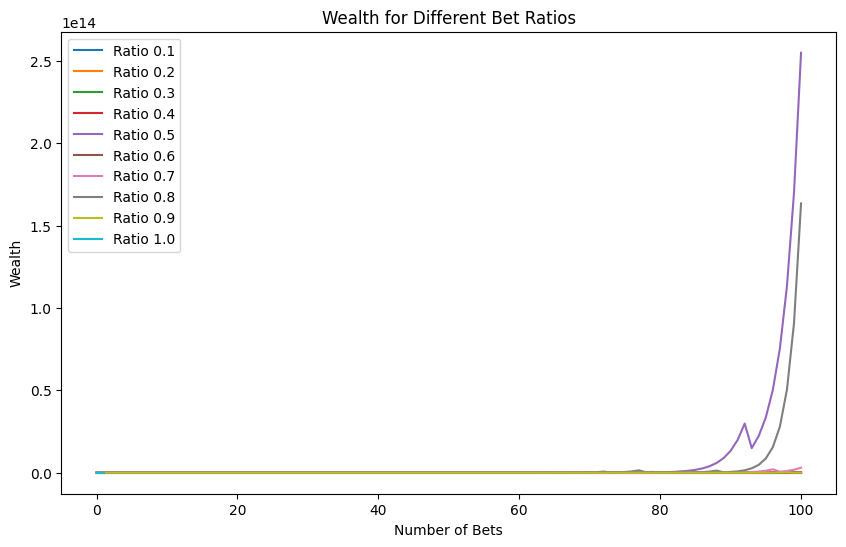

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Ë®≠ÂÆöËÆäÊï∏
initial_wealth = 1000
bet_ratios = [i/10 for i in range(1, 11)]  # Âæû10%Âà∞ÂÖ®ÊäºÁöÑ‰∏ãÊ≥®ÊØî‰æã
num_bets = 100
win_rate =0.8

df = pd.DataFrame()
# Ê®°Êì¨ÂêÑÊØî‰æã‰∏ãÊ≥®
for bet_ratio in bet_ratios:
  wealths = simulate_bets(initial_wealth, bet_ratio, win_rate, num_bets, verbose=False)
  df[f'Ratio {bet_ratio}'] = pd.Series(wealths)

final_wealths = df.iloc[-1]
max_ratio = final_wealths.idxmax() # ÊâæÂà∞ÊúÄÂ•ΩÁöÑ‰∏ãÊ≥®ÊØî‰æã
max_value = final_wealths.max()  # ÊúÄÈ´òË≥áÁî¢

print(f"ÊúÄÂ•ΩÁöÑ‰∏ãÊ≥®ÊØî‰æãÁÇ∫: {max_ratio}, ÊúÄÁµÇË≥áÁî¢Ôºö{max_value}")

# Áπ™Ë£ΩÂúñË°®
ax = df.plot(figsize=(10,6), legend=True, title='Wealth for Different Bet Ratios')
ax.set_xlabel('Number of Bets')
ax.set_ylabel('Wealth')
plt.show()

### 5Ô∏è‚É£ ÂÄçÂÄç‰∏ãÊ≥®Ê≥ï

‰∏ãÊ≥®ÊñπÊ≥ïÊéíÂêçÔºö
Á¨¨1Âêç:Ratio 0.6, ÊúÄÁµÇË≥áÁî¢Ôºö234854258277.38318
Á¨¨2Âêç:Ratio 0.5, ÊúÄÁµÇË≥áÁî¢Ôºö116600606971.45903
Á¨¨3Âêç:Ratio 0.3, ÊúÄÁµÇË≥áÁî¢Ôºö1933188919.0797477
Á¨¨4Âêç:Ratio 0.4, ÊúÄÁµÇË≥áÁî¢Ôºö604450471.5910275
Á¨¨5Âêç:Ratio 0.9, ÊúÄÁµÇË≥áÁî¢Ôºö72076763.6778686
Á¨¨6Âêç:Ratio 0.7, ÊúÄÁµÇË≥áÁî¢Ôºö16281727.105879573
Á¨¨7Âêç:Ratio 0.2, ÊúÄÁµÇË≥áÁî¢Ôºö11069217.105402032
Á¨¨8Âêç:Ratio 0.1, ÊúÄÁµÇË≥áÁî¢Ôºö203758.07346974063
Á¨¨9Âêç:Ratio 0.8, ÊúÄÁµÇË≥áÁî¢Ôºö46901.6125132311
Á¨¨10Âêç:double_bet, ÊúÄÁµÇË≥áÁî¢Ôºö1080.0
Á¨¨11Âêç:Ratio 1.0, ÊúÄÁµÇË≥áÁî¢Ôºönan


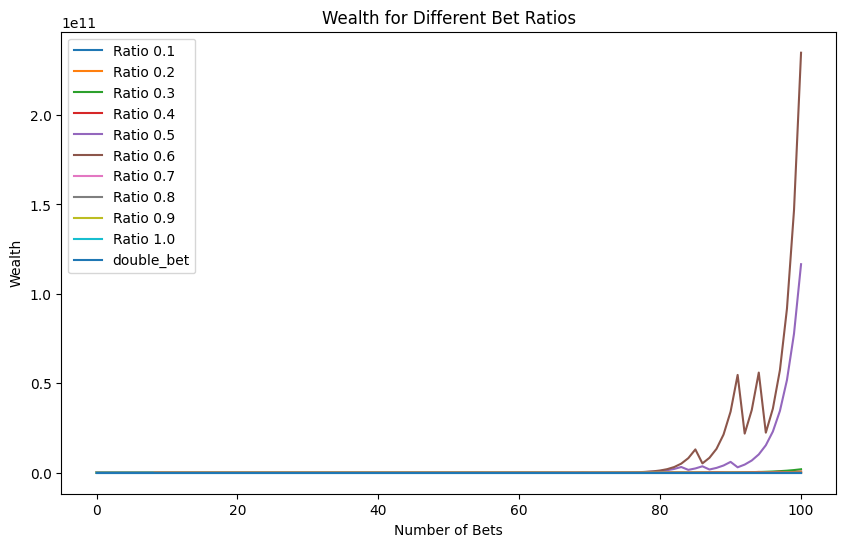

In [ ]:
def double_bet(initial_wealth, win_rate, num_bets=100, odds=1):
  wealths = [initial_wealth]
  wealth = initial_wealth
  initial_bet = 1
  bet = initial_bet
  for i in range(num_bets):
    if random.uniform(0, 1) <= win_rate:
      # Ëã•Ë¥è‰∫ÜÔºåÂâá‰∏ãÊ≥®ÂàùÂßãÈáëÈ°ç
      wealth += bet * odds
      bet = initial_bet
    else:
      # Ëã•Ëº∏‰∫ÜÔºåÂâáÂä†ÂÄç‰∏ãÊ≥®ÈáëÈ°ç
      wealth -= bet
      bet *= 2
    wealths.append(wealth)

    # Ëº∏ÂÖâÂ∞±Ë∑≥Âá∫Ëø¥Âúà
    if wealth <= 0:
      break

  return wealths

# Ë®≠ÂÆöËÆäÊï∏
initial_wealth = 1000
bet_ratios = [i/10 for i in range(1, 11)]  # Âæû10%Âà∞ÂÖ®ÊäºÁöÑ‰∏ãÊ≥®ÊØî‰æã
num_bets = 100
win_rate =0.8

df = pd.DataFrame()
# Ê®°Êì¨ÂêÑÊØî‰æã‰∏ãÊ≥®
for bet_ratio in bet_ratios:
  wealths = simulate_bets(initial_wealth, bet_ratio, win_rate, num_bets, verbose=False)
  df[f'Ratio {bet_ratio}'] = pd.Series(wealths)

# ÂÄçÂÄç‰∏ãÊ≥®Ê≥ïÊ®°Êì¨ÁµêÊûú
wealths_double = double_bet(initial_wealth, win_rate, num_bets)
df['double_bet'] = pd.Series(wealths_double)

# ‰∏ãÊ≥®Ê≥ïÊéíÂêç
final_wealths = df.iloc[-1]
sorted_wealths = final_wealths.sort_values(ascending=False)
print("‰∏ãÊ≥®ÊñπÊ≥ïÊéíÂêçÔºö")
i = 1
for index, value in zip(sorted_wealths.index, sorted_wealths.values):
    print(f"Á¨¨{i}Âêç:{index}, ÊúÄÁµÇË≥áÁî¢Ôºö{value}")
    i += 1

# Áπ™Ë£ΩÂúñË°®
ax = df.plot(figsize=(10,6), legend=True, title='Wealth for Different Bet Ratios')
ax.set_xlabel('Number of Bets')
ax.set_ylabel('Wealth')
plt.show()

### 6Ô∏è‚É£ Âá±Âà©ÂÖ¨Âºè Kelly formula

In [ ]:
def kelly_formula(p,b):
  # ÊúÄ‰Ω≥‰∏ãÊ≥®ÊØî‰æã
  best_bet = (b * p - (1 - p)) / b
  # Â¶ÇÊûú‰∏ãÊ≥®ÊØî‰æãÂ∞èÊñºÁ≠âÊñº 0ÔºåÂâáË®≠ÁÇ∫ 0
  if best_bet <= 0:
      return 0
  # ÂèñÂà∞Â∞èÊï∏ÈªûÂæåÂÖ©‰Ωç
  best_bet = round(best_bet,2)
  return best_bet

kelly_formula(p=0.8,b=1)

best_bet = kelly_formula(p=0.8, b=1)
print("ÊúÄ‰Ω≥‰∏ãÊ≥®ÊØî‰æãÁÇ∫:", best_bet)

ÊúÄ‰Ω≥‰∏ãÊ≥®ÊØî‰æãÁÇ∫: 0.6


### 7Ô∏è‚É£ ÂÆâË£ùÂèäÂåØÂÖ•Â•ó‰ª∂

In [ ]:
!pip install yfinance==0.2.38
!pip install backtesting
!pip install bokeh==2.4.3 # Áπ™ÂúñÂ•ó‰ª∂
import yfinance as yf
import numpy as np
import pandas as pd # Ë≥áÊñôËôïÁêÜÂ•ó‰ª∂
from scipy.stats import norm
import datetime as dt # ÊôÇÈñìÂ•ó‰ª∂
from backtesting import Backtest, Strategy
from backtesting.lib import crossover

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:50: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


### 8Ô∏è‚É£ ÂèñÂæóÂõûÊ∏¨ÁµêÊûú

In [ ]:
# ÂèñÂæóËÇ°ÂÉπË≥áÊñô
stock_id = "2330.tw"
df = yf.download(stock_id, period="5y")
df['ma1'] = df['Close'].rolling(window=5).mean()
df['ma2'] = df['Close'].rolling(window=10).mean()


# ÂÆöÁæ©ÂõûÊ∏¨Á≠ñÁï•
class CrossStrategy(Strategy):
  def init(self):
    super().init()

  def next(self):
    if crossover(self.data.ma1, self.data.ma2):
      self.buy(size=1)
    elif crossover(self.data.ma2, self.data.ma1):
      self.sell(size=1)


# ÂõûÊ∏¨ÁµêÊûú
backtest = Backtest(df,
        CrossStrategy,
        cash=100000,
        commission=0.004,
        margin=1,
        hedging=False,
        trade_on_close=False,
        exclusive_orders=False,
        )
stats = backtest.run()
print(stats)

[*********************100%%**********************]  1 of 1 completed
Start                     2019-01-29 00:00:00
End                       2024-01-29 00:00:00
Duration                   1826 days 00:00:00
Exposure Time [%]                   73.415638
Equity Final [$]                   100058.484
Equity Peak [$]                    100473.894
Return [%]                           0.058484
Buy & Hold Return [%]              190.337079
Return (Ann.) [%]                    0.012127
Volatility (Ann.) [%]                0.192189
Sharpe Ratio                           0.0631
Sortino Ratio                        0.089536
Calmar Ratio                         0.029332
Max. Drawdown [%]                   -0.413451
Avg. Drawdown [%]                   -0.064584
Max. Drawdown Duration      461 days 00:00:00
Avg. Drawdown Duration       84 days 00:00:00
# Trades                                   65
Win Rate [%]                        43.076923
Best Trade [%]                      35.820355
Worst Trade

### 9Ô∏è‚É£ Ë®àÁÆóË≥†Áéá„ÄÅÂèñÂæóÂãùÁéáÂèäÊúÄ‰Ω≥‰∏ãÊ≥®ÊØî‰æã

In [ ]:
# ÂÖàË®àÁÆóÂá∫Áç≤Âà©ÂèäËôßÊêçÊôÇÁöÑÂπ≥ÂùáÂ†±ÈÖ¨
def trades_returns(returns):
    profits = returns[returns > 0].tolist()
    losses = returns[returns < 0].tolist()

    # Á¢∫‰øùÂàÜÊØç‰∏çÁÇ∫Èõ∂
    avg_profit = sum(profits) / len(profits) if profits else 0
    avg_loss = sum(losses) / len(losses) if losses else 0

    return avg_profit, avg_loss

avg_profit, avg_loss = trades_returns(stats['_trades']['ReturnPct'])
print(f"Áç≤Âà©ÊôÇÁöÑÂπ≥ÂùáÂ†±ÈÖ¨:{avg_profit*100:.2f}%")
print(f"ËôßÊêçÊôÇÁöÑÂπ≥ÂùáÂ†±ÈÖ¨:{avg_loss*100:.2f}%")
print("--------------------------")

# Áî®Âπ≥ÂùáÁç≤Âà©Èô§‰ª•Âπ≥ÂùáËôßÊêç‰æÜÊé®‰º∞Ë≥†Áéá
b = -avg_profit/avg_loss
p = stats['Win Rate [%]']/100
print(f"Ë≥†ÁéáÁÇ∫:{b:.2f}")
print(f"ÂãùÁéáÁÇ∫:{p*100:.2f}%")
print("--------------------------")

# ‰ª£ÂÖ•Âá±Âà©ÂÖ¨Âºè
best_bet = kelly_formula(p=p, b=b)
print("ÊúÄ‰Ω≥‰∏ãÊ≥®ÊØî‰æãÁÇ∫:", best_bet)

Áç≤Âà©ÊôÇÁöÑÂπ≥ÂùáÂ†±ÈÖ¨:6.76%
ËôßÊêçÊôÇÁöÑÂπ≥ÂùáÂ†±ÈÖ¨:-4.59%
--------------------------
Ë≥†ÁéáÁÇ∫:1.47
ÂãùÁéáÁÇ∫:43.08%
--------------------------
ÊúÄ‰Ω≥‰∏ãÊ≥®ÊØî‰æãÁÇ∫: 0.04


### üîü Áî®Âá±Âà©ÂÖ¨Âºè‰æÜÊõ¥ÊîπÁ≠ñÁï•

In [ ]:
# ÂÆöÁæ©ÂõûÊ∏¨Á≠ñÁï•
class CrossStrategy(Strategy):
  kelly_ratio = 0.3  # Âá±Âà©ÂÖ¨ÂºèÁöÑ‰∏ãÊ≥®ÊØîÁéá

  def init(self):
    super().init()

  def next(self):

    size = (self.equity * self.kelly_ratio) / self.data.Close[-1]
    size = max(round(size), 1) # Á¢∫‰øù‰∫§ÊòìËÇ°Êï∏ÁÇ∫Êï¥Êï∏

    if crossover(self.data.ma1, self.data.ma2):
        self.buy(size=size)
    elif crossover(self.data.ma2, self.data.ma1):
        self.sell(size=size)


# ÂõûÊ∏¨ÁµêÊûú
backtest = Backtest(df,
        CrossStrategy,
        cash=100000,
        commission=0.004,
        margin=1,
        hedging=False,
        trade_on_close=False,
        exclusive_orders=False,
        )
stats = backtest.run()
print(stats)

Start                     2019-01-29 00:00:00
End                       2024-01-29 00:00:00
Duration                   1826 days 00:00:00
Exposure Time [%]                   97.119342
Equity Final [$]                   121074.244
Equity Peak [$]                    134354.484
Return [%]                          21.074244
Buy & Hold Return [%]              190.337079
Return (Ann.) [%]                    4.046039
Volatility (Ann.) [%]                7.943343
Sharpe Ratio                         0.509362
Sortino Ratio                        0.805746
Calmar Ratio                         0.357368
Max. Drawdown [%]                  -11.321771
Avg. Drawdown [%]                   -2.114875
Max. Drawdown Duration      476 days 00:00:00
Avg. Drawdown Duration       57 days 00:00:00
# Trades                                  127
Win Rate [%]                        44.094488
Best Trade [%]                      44.828848
Worst Trade [%]                     -13.44591
Avg. Trade [%]                    

## 9-2 ÊäïË≥áÁµÑÂêàË≥áÈáëÂàÜÈÖçËàáÈ¢®Èö™ÁÆ°ÁêÜ

### 1Ô∏è‚É£1Ô∏è‚É£ ÊéõËºâÈõ≤Á´ØÁ°¨Á¢ü & ÂÆâË£ùÂ•ó‰ª∂

In [ ]:
!pip install gdown
import gdown
import os
!git clone https://github.com/FlagTech/F3933.git
%cd F3933
from Stock_DB import StockDB
%cd ..
from google.colab import drive
drive.mount('/content/drive')

fatal: destination path 'Document_loader' already exists and is not an empty directory.
/content/Document_loader
/content
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1Ô∏è‚É£2Ô∏è‚É£ ‰∏ãËºâË≥áÊñôÂ∫´

In [ ]:
# ÊåáÂÆö‰∏ãËºâË∑ØÂæë
!mkdir -p "/content/drive/MyDrive/StockGPT/"
output_path = '/content/drive/MyDrive/StockGPT/'

# Ê™¢Êü•Ë≥áÊñôÂ∫´ÊòØÂê¶Â≠òÂú®
stock_db_path = output_path + 'stock.db'
if not os.path.exists(stock_db_path):
    print("‰∏ãËºâË≥áÊñôÂ∫´‰∏≠...")
    id = '1S5JE9ZF2hohRpvO8FikgLhQmN2DJrVgW'

    gdown.download(id=id, output=stock_db_path)
    print("‰∏ãËºâÂÆåÊàê")
else:
    print("ÁÑ°ÈúÄ‰∏ãËºâ")

ÁÑ°ÈúÄ‰∏ãËºâ


Ëã•ÈúÄÊõ¥Êñ∞Ë≥áÊñôÂ∫´, ÂèØÂü∑Ë°å‰ª•‰∏ãÁ®ãÂºèÁ¢º

```
stock_db = StockDB()
stock_db.renew()
stock_db.close()
```



### 1Ô∏è‚É£3Ô∏è‚É£ Ë®≠ÂÆöÊäïË≥áÁµÑÂêà

In [ ]:
# ‰ª•10Ê™îËÇ°Á•®ÁÇ∫‰æã
stock_list = [1101, 1203, 1216, 1402, 1722,
               1762, 2330, 2608, 2884, 6405]

condition = f"ËÇ°Ëôü IN ({','.join(map(str, stock_list))})"

# ÂæûË≥áÊñôÂ∫´ÂèñÂá∫Ë≥áÊñô
stock_db = StockDB()
df = stock_db.get(table="Êó•È†ª", where=condition)
df = df.dropna()
df.tail()

ËÇ°Ëôü         Êó•Êúü        ÈñãÁõ§ÂÉπ        ÊúÄÈ´òÂÉπ        ÊúÄ‰ΩéÂÉπ        Êî∂Áõ§ÂÉπ        ÈÇÑÂéüÂÉπ  \
0  1101 2015-01-05  31.923370  31.923370  31.482035  31.629147  20.498331   
1  1101 2015-01-06  31.261366  31.334923  30.967140  31.077475  20.140799   
2  1101 2015-01-07  31.077475  31.298143  30.783251  30.967140  20.069292   
3  1101 2015-01-08  31.077475  31.371700  30.967140  31.077475  20.140799   
4  1101 2015-01-09  31.114252  31.334923  30.746471  30.746471  19.926281   

          Êàê‰∫§Èáè   ÊÆñÂà©Áéá   Êó•Êú¨ÁõäÊØî  ËÇ°ÂÉπÊ∑®ÂÄºÊØî ‰∏âÂ§ßÊ≥ï‰∫∫Ë≤∑Ë≥£Ë∂ÖËÇ°Êï∏   ËûçË≥áË≤∑ÂÖ•  ËûçÂç∑Ë≥£Âá∫  
0   3847400.0  5.35  14.88   1.42  -1005483  211.0  20.0  
1  10386622.0  5.44  14.62   1.40  -2524874  208.0  32.0  
2  11841293.0  5.46  14.57   1.39  -5742000  264.0  13.0  
3  11815462.0  5.44  14.62   1.40  -5120668  245.0  38.0  
4  14240820.0  5.50  14.46   1.38  -7993555  566.0  56.0

###1Ô∏è‚É£4Ô∏è‚É£ Ë®àÁÆóÊØèÊúàÁöÑÊº≤ÂπÖÊàñË∑åÂπÖ

In [ ]:
# Ë®≠ÂÆöÊó•ÊúüÁÇ∫Á¥¢Âºï
df['Êó•Êúü'] = pd.to_datetime(df['Êó•Êúü'])
df.set_index('Êó•Êúü', inplace=True)
df = df[df.index > '2017-01-01']

# Ë®ìÁ∑¥Ë≥áÊñôËàáÊ∏¨Ë©¶Ë≥áÊñô
start = "2021-01-01"
end = "2023-10-10"
train_df = df[df.index <= start]
test_df = df[(df.index > start) & (df.index <= end)]

# ÂèñÂá∫ÊØèÊúàÊúÄÂæå‰∏ÄÂÄã‰∫§ÊòìÊó•ÁöÑÊî∂Áõ§ÂÉπ
monthly_closing = train_df.groupby('ËÇ°Ëôü')\
                          .resample('M')['Êî∂Áõ§ÂÉπ'].last()

# Ë®àÁÆóÊØèÊúàÁöÑÊº≤ÂπÖÊàñË∑åÂπÖ
monthly_return = monthly_closing.groupby(level=0)\
                                .pct_change().fillna(0)

print(monthly_return)

ËÇ°Ëôü    Êó•Êúü        
1101  2017-01-31    0.000000
      2017-02-28    0.063559
      2017-03-31   -0.035857
      2017-04-30   -0.033058
      2017-05-31   -0.019943
                      ...   
6405  2020-08-31   -0.044855
      2020-09-30    0.038674
      2020-10-31   -0.061170
      2020-11-30    0.084986
      2020-12-31    0.120105
Name: Êî∂Áõ§ÂÉπ, Length: 480, dtype: float64


###1Ô∏è‚É£5Ô∏è‚É£ Ë®àÁÆóÊØèÊ™îËÇ°Á•®ÁöÑÊúÄ‰Ω≥‰∏ãÊ≥®ÊØî‰æã

In [ ]:
results = []

# Ë®àÁÆóÊØèÊ™îËÇ°Á•®ÁöÑÊúÄ‰Ω≥‰∏ãÊ≥®ÊØî‰æã
for stock in stock_list:
    str_stock = str(stock)
    avg_profit, avg_loss = trades_returns(monthly_return[str_stock])
    b = -avg_profit/avg_loss # Ë≥†Áéá
    p = len(monthly_return[str_stock][monthly_return[str_stock] > 0]
            ) / len(monthly_return[str_stock])  # ÂãùÁéá
    best_bet = kelly_formula(p=p, b=b) # ‰∏ãÊ≥®ÊØî‰æã

    results.append([stock, avg_profit, avg_loss, p, b, best_bet])

# Âêà‰ΩµÁÇ∫ DataFrame
df_results = pd.DataFrame(results,
              columns=['ËÇ°Ëôü', 'Âπ≥ÂùáÊº≤ÂπÖ', 'Âπ≥ÂùáË∑åÂπÖ',
                  'ÂãùÁéá', 'Ë≥†Áéá', '‰∏ãÊ≥®ÊØî‰æã'])

total_bet = df_results['‰∏ãÊ≥®ÊØî‰æã'].sum()
df_results['Ë≥áÈáëÂàÜÈÖç'] = df_results['‰∏ãÊ≥®ÊØî‰æã'] / total_bet

df_results

ËÇ°Ëôü      Âπ≥ÂùáÊº≤ÂπÖ      Âπ≥ÂùáË∑åÂπÖ        ÂãùÁéá        Ë≥†Áéá  ‰∏ãÊ≥®ÊØî‰æã      Ë≥áÈáëÂàÜÈÖç
0  1101  0.042147 -0.033390  0.562500  1.262293  0.22  0.111111
1  1203  0.024024 -0.014281  0.625000  1.682224  0.40  0.202020
2  1216  0.040596 -0.033364  0.520833  1.216760  0.13  0.065657
3  1402  0.044509 -0.049732  0.562500  0.894973  0.07  0.035354
4  1722  0.037341 -0.038913  0.583333  0.959612  0.15  0.075758
5  1762  0.099330 -0.060044  0.520833  1.654290  0.23  0.116162
6  2330  0.067950 -0.047247  0.583333  1.438197  0.29  0.146465
7  2608  0.033360 -0.032416  0.500000  1.029125  0.01  0.005051
8  2884  0.036476 -0.043529  0.708333  0.837968  0.36  0.181818
9  6405  0.096346 -0.060858  0.458333  1.583135  0.12  0.060606

###1Ô∏è‚É£6Ô∏è‚É£ ÊØîËºÉÂπ≥ÂùáÂàÜÈÖçËàá‰ΩøÁî®‰∏ãÊ≥®ÊØî‰æãÁöÑÂ†±ÈÖ¨

In [ ]:
# Ë®àÁÆóÊ∏¨Ë©¶Ë≥áÊñôÁöÑÊØèÊúàÊº≤ÂπÖÊàñË∑åÂπÖ
monthly_closing_test = test_df.groupby('ËÇ°Ëôü')\
                .resample('M')['Êî∂Áõ§ÂÉπ'].last()
monthly_return_test = monthly_closing_test.groupby(level=0)\
                                .pct_change().fillna(0)
first_price = monthly_closing_test.groupby('ËÇ°Ëôü').first()
last_price = monthly_closing_test.groupby('ËÇ°Ëôü').last()


# Ë®àÁÆóÂ†±ÈÖ¨Áéá
returns = (last_price /first_price)
df_results['ËÇ°Ëôü'] = df_results['ËÇ°Ëôü'].astype(str)
df_results_test = df_results.merge(
    returns.rename('Â†±ÈÖ¨Áéá'), left_on='ËÇ°Ëôü', right_index=True)
display(df_results_test)

# Ë®≠ÂÆöÂàùÂßãË≥áÈáë
initial_capital = 100000

# Âπ≥ÂùáÂàÜÈÖçÁ≠ñÁï•ÁöÑÁµêÊûú
avg = initial_capital / len(stock_list)
avg_strategy = sum(df_results_test['Â†±ÈÖ¨Áéá'] * avg)

# ‰ΩøÁî®‰∏ãÊ≥®ÊØî‰æãÁöÑÁ≠ñÁï•ÁµêÊûú
bet_strategy = sum(df_results_test['Â†±ÈÖ¨Áéá'] *(
    df_results_test['Ë≥áÈáëÂàÜÈÖç'] * initial_capital))

print(f"Âπ≥ÂùáÂàÜÈÖçÁ≠ñÁï•ÁöÑÊúÄÁµÇË≥áÈáë: {avg_strategy}")
print(f"‰∏ãÊ≥®ÊØî‰æãÁ≠ñÁï•ÁöÑÊúÄÁµÇË≥áÈáë: {bet_strategy}")

ËÇ°Ëôü      Âπ≥ÂùáÊº≤ÂπÖ      Âπ≥ÂùáË∑åÂπÖ        ÂãùÁéá        Ë≥†Áéá  ‰∏ãÊ≥®ÊØî‰æã      Ë≥áÈáëÂàÜÈÖç       Â†±ÈÖ¨Áéá
0  1101  0.042147 -0.033390  0.562500  1.262293  0.22  0.111111  0.898572
1  1203  0.024024 -0.014281  0.625000  1.682224  0.40  0.202020  1.166667
2  1216  0.040596 -0.033364  0.520833  1.216760  0.13  0.065657  1.010294
3  1402  0.044509 -0.049732  0.562500  0.894973  0.07  0.035354  1.098077
4  1722  0.037341 -0.038913  0.583333  0.959612  0.15  0.075758  1.208748
5  1762  0.099330 -0.060044  0.520833  1.654290  0.23  0.116162  1.099251
6  2330  0.067950 -0.047247  0.583333  1.438197  0.29  0.146465  0.900169
7  2608  0.033360 -0.032416  0.500000  1.029125  0.01  0.005051  0.899149
8  2884  0.036476 -0.043529  0.708333  0.837968  0.36  0.181818  1.215912
9  6405  0.096346 -0.060858  0.458333  1.583135  0.12  0.060606  1.284289

Âπ≥ÂùáÂàÜÈÖçÁ≠ñÁï•ÁöÑÊúÄÁµÇË≥áÈáë: 107811.2775886113
‰∏ãÊ≥®ÊØî‰æãÁ≠ñÁï•ÁöÑÊúÄÁµÇË≥áÈáë: 109524.21874729404


###1Ô∏è‚É£7Ô∏è‚É£ ËàáÂ§ßÁõ§Á∏æÊïàÈÄ≤Ë°åÊØîËºÉ

[*********************100%%**********************]  1 of 1 completed


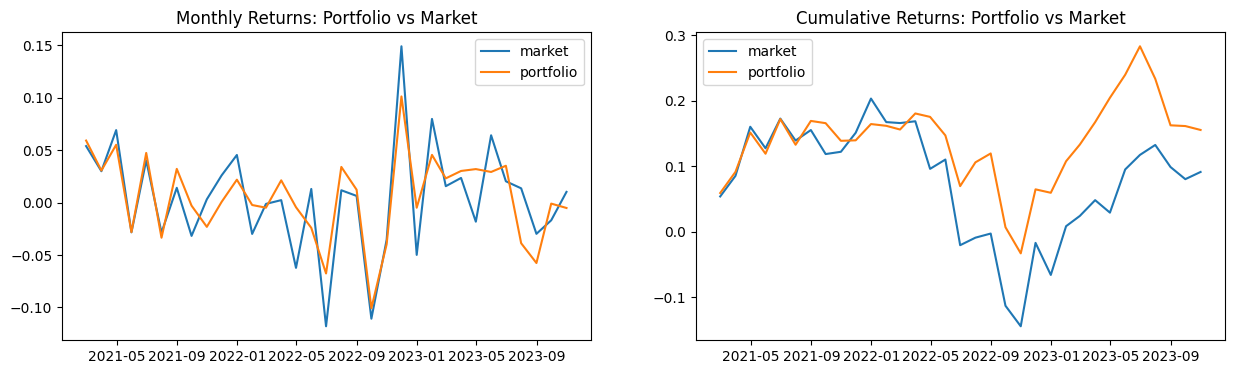

In [ ]:
# ÊäïÁµÑÊØèÊúàÂ†±ÈÖ¨
returns_df = pd.concat([monthly_return_test[str(stock)]
                         for stock in stock_list], axis=1)
returns_df.columns = stock_list
weights = df_results['Ë≥áÈáëÂàÜÈÖç'].values
returns_df['ÊäïÁµÑÂ†±ÈÖ¨'] = returns_df[stock_list].dot(weights)

# Ë®àÁÆóÂ§ßÁõ§Â†±ÈÖ¨
market_index = yf.download("^TWII",start=start,end=end)
market_closing = market_index.resample('M')['Close'].last()
market_return = market_closing.pct_change().fillna(0)
returns_df['Â§ßÁõ§Â†±ÈÖ¨'] = market_return

# Á¥ØÁ©çÂ†±ÈÖ¨
returns_df['ÊäïÁµÑÁ¥ØÁ©çÂ†±ÈÖ¨'] = (1 + returns_df['ÊäïÁµÑÂ†±ÈÖ¨']).cumprod() - 1
returns_df['Â§ßÁõ§Á¥ØÁ©çÂ†±ÈÖ¨'] = (1 + returns_df['Â§ßÁõ§Â†±ÈÖ¨']).cumprod() - 1

# Áπ™Ë£ΩÂ§ßÁõ§ËàáÊäïÁµÑÁ∏æÊïà
returns_df = returns_df.drop(returns_df.index[0])
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15, 4))

ax1.plot(returns_df['Â§ßÁõ§Â†±ÈÖ¨'], label="market")
ax1.plot(returns_df['ÊäïÁµÑÂ†±ÈÖ¨'], label="portfolio")
ax1.set_title("Monthly Returns: Portfolio vs Market")
ax1.legend()

ax2.plot(returns_df['Â§ßÁõ§Á¥ØÁ©çÂ†±ÈÖ¨'], label="market")
ax2.plot(returns_df['ÊäïÁµÑÁ¥ØÁ©çÂ†±ÈÖ¨'], label="portfolio")
ax2.set_title("Cumulative Returns: Portfolio vs Market")
ax2.legend()

plt.show()

###1Ô∏è‚É£8Ô∏è‚É£ ÊäïË≥áÁµÑÂêàÊ®ôÊ∫ñÂ∑Æ (œÉ)

In [ ]:
# Ë®àÁÆóÂÖ±ËÆäÁï∞Êï∏Áü©Èô£
stk_returns_df = returns_df.iloc[:, :-4]
cov_matrix = stk_returns_df.cov()
display(cov_matrix)

# Ë®àÁÆóÊäïË≥áÁµÑÂêàÁöÑÂ†±ÈÖ¨ËàáÊ®ôÊ∫ñÂ∑Æ
portfolio_return = np.dot(weights, stk_returns_df.mean().values)
portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix.values, weights)))

# ËΩâÊèõÊàêÂπ¥Âåñ
annualized_portfolio_return = (1 + portfolio_return)**12 - 1
annualized_portfolio_std = portfolio_std * (12**0.5)
annualized_market_return = (1 + market_return.mean())**12 - 1
annualized_market_std = market_return.std() * (12**0.5)

print(f"ÊäïË≥áÁµÑÂêàÁöÑÂπ¥ÂåñÂ†±ÈÖ¨Áéá:{annualized_portfolio_return*100:.2f}%")
print(f"ÊäïË≥áÁµÑÂêàÁöÑÂπ¥ÂåñÊ®ôÊ∫ñÂ∑Æ:{annualized_portfolio_std*100:.2f}%")

print(f"Â§ßÁõ§ÊåáÊï∏ÁöÑÂπ¥ÂåñÂ†±ÈÖ¨Áéá:{annualized_market_return*100:.2f}%")
print(f"Â§ßÁõ§ÊåáÊï∏ÁöÑÂπ¥ÂåñÊ®ôÊ∫ñÂ∑Æ:{annualized_market_std*100:.2f}%")

1101      1203      1216      1402      1722      1762      2330  \
1101  0.004561  0.000414  0.000602  0.001047  0.002989  0.002175  0.002499   
1203  0.000414  0.001502  0.000350  0.000535  0.000050  0.000820  0.001437   
1216  0.000602  0.000350  0.001127  0.000170  0.000113  0.001444  0.000276   
1402  0.001047  0.000535  0.000170  0.002178  0.000612  0.001772  0.000339   
1722  0.002989  0.000050  0.000113  0.000612  0.004117  0.001316  0.001476   
1762  0.002175  0.000820  0.001444  0.001772  0.001316  0.014119  0.002504   
2330  0.002499  0.001437  0.000276  0.000339  0.001476  0.002504  0.006524   
2608  0.001317  0.000246 -0.000052  0.000033 -0.000731  0.000869  0.001485   
2884  0.001795  0.000288  0.000293  0.000619  0.001803  0.001708  0.001875   
6405  0.001320 -0.000281 -0.000408  0.002654  0.002414  0.002995  0.001049   

          2608      2884      6405  
1101  0.001317  0.001795  0.001320  
1203  0.000246  0.000288 -0.000281  
1216 -0.000052  0.000293 -0.000408  
1402  0.000033  0.000619  0.002654  
1722 -0.000731  0.001803  0.002414  
1762  0.000869  0.001708  0.002995  
2330  0.001485  0.001875  0.001049  
2608  0.011438 -0.000281  0.003025  
2884 -0.000281  0.002324  0.001105  
6405  0.003025  0.001105  0.023437

ÊäïË≥áÁµÑÂêàÁöÑÂπ¥ÂåñÂ†±ÈÖ¨Áéá:6.42%
ÊäïË≥áÁµÑÂêàÁöÑÂπ¥ÂåñÊ®ôÊ∫ñÂ∑Æ:14.12%
Â§ßÁõ§ÊåáÊï∏ÁöÑÂπ¥ÂåñÂ†±ÈÖ¨Áéá:4.70%
Â§ßÁõ§ÊåáÊï∏ÁöÑÂπ¥ÂåñÊ®ôÊ∫ñÂ∑Æ:17.68%


###1Ô∏è‚É£9Ô∏è‚É£ È¢®Èö™ÂÄº (Value at Risk, VaR)

In [ ]:
confidence_level = 0.95

# ÊúàÈ†ª VaR
VaR = portfolio_return - portfolio_std * norm.ppf(confidence_level)
# Âπ¥È†ª VaR
VaR_annualized = VaR * (12**0.5)

print(f"Âú® {confidence_level*100:.0f}% ÁöÑ‰ø°ÂøÉÊ∞¥Ê∫ñ‰∏ã,\
 ‰∏ãÂÄãÊúàÁöÑÊúÄÂ§ßÂèØËÉΩÊêçÂ§±ÁÇ∫Ôºö{VaR*100:.2f}%")
print(f"Âú® {confidence_level*100:.0f}% ÁöÑ‰ø°ÂøÉÊ∞¥Ê∫ñ‰∏ã,\
 ÊòéÂπ¥ÊúÄÂ§ßÂèØËÉΩÊêçÂ§±ÁÇ∫Ôºö{VaR_annualized*100:.2f}%")

Âú® 95% ÁöÑ‰ø°ÂøÉÊ∞¥Ê∫ñ‰∏ã, ‰∏ãÂÄãÊúàÁöÑÊúÄÂ§ßÂèØËÉΩÊêçÂ§±ÁÇ∫Ôºö-6.19%
Âú® 95% ÁöÑ‰ø°ÂøÉÊ∞¥Ê∫ñ‰∏ã, ÊòéÂπ¥ÊúÄÂ§ßÂèØËÉΩÊêçÂ§±ÁÇ∫Ôºö-21.43%


###2Ô∏è‚É£0Ô∏è‚É£ beta ‰øÇÊï∏ (Œ≤)


In [ ]:
# Ë®àÁÆóŒ≤‰øÇÊï∏
portfolio_market_cov = returns_df[['ÊäïÁµÑÂ†±ÈÖ¨', 'Â§ßÁõ§Â†±ÈÖ¨']].cov()\
                               .iloc[0, 1]
market_var = returns_df['Â§ßÁõ§Â†±ÈÖ¨'].var()
portfolio_beta = portfolio_market_cov / market_var

print(f"ÊäïÁµÑËàáÂ§ßÁõ§ÁöÑÂÖ±ËÆäÁï∞Êï∏ÁÇ∫Ôºö{portfolio_market_cov:.5f},\
    Â§ßÁõ§ËÆäÁï∞Êï∏ÁÇ∫Ôºö{market_var:.5f}")
print(f"ÊäïË≥áÁµÑÂêàÁöÑŒ≤‰øÇÊï∏Ôºö{portfolio_beta:.2f}")

ÊäïÁµÑËàáÂ§ßÁõ§ÁöÑÂÖ±ËÆäÁï∞Êï∏ÁÇ∫Ôºö0.00177,    Â§ßÁõ§ËÆäÁï∞Êï∏ÁÇ∫Ôºö0.00269
ÊäïË≥áÁµÑÂêàÁöÑŒ≤‰øÇÊï∏Ôºö0.66


###2Ô∏è‚É£1Ô∏è‚É£ Â§èÊôÆÊØîÁéá (Sharpe Ratio)

In [ ]:
# Ë®≠ÂÆöÁÑ°È¢®Èö™Âà©Áéá
risk_free_rate = 0.015/12  # ËΩâÊèõÊàêÊúàÈ†ª (ÁÆóË°ìÂπ≥Âùá)

average_return = returns_df['ÊäïÁµÑÂ†±ÈÖ¨'].mean()
portfolio_std = returns_df['ÊäïÁµÑÂ†±ÈÖ¨'].std()

sharpe_ratio = (average_return - risk_free_rate) / portfolio_std
sharpe_ratio_annualized = sharpe_ratio * (12**0.5)

print(f"ÊäïË≥áÁµÑÂêàÁöÑÂ§èÊôÆÊØîÁéáÔºö{sharpe_ratio:.2f}")
print(f"Âπ¥ÂåñÁöÑÂ§èÊôÆÊØîÁéáÔºö{sharpe_ratio_annualized:.2f}")

ÊäïË≥áÁµÑÂêàÁöÑÂ§èÊôÆÊØîÁéáÔºö0.10
Âπ¥ÂåñÁöÑÂ§èÊôÆÊØîÁéáÔºö0.34
